### Add scripts to the notebook

In [1]:
import sys
import os

current_dir = os.getcwd()
print(current_dir)

# Get the parent directory
parent_dir = os.path.dirname(current_dir)

scripts_path = os.path.join(parent_dir, 'scripts')

# Insert the path to the parent directory
sys.path.insert(0, parent_dir)

# Insert the path to the Scripts directory
sys.path.insert(0, scripts_path)

# Add the parent directory to the Python path
sys.path.append(os.path.abspath(os.path.join('..')))

d:\KifiyaAIM-Course\Week - 4\Rossman-Pharma-Sales-Prediction\notebooks


### Import Statements

In [2]:
from scripts.modeling import SalesModel
import pandas as pd

### Load model

In [3]:
train = pd.read_csv('../data/train_processed.csv', low_memory=False, index_col='Date').drop(columns=["Date.1"])
    
test = pd.read_csv('../data/test_processed.csv', low_memory=False, index_col='Id').drop(columns=["Date"])

### Start training

In [4]:
sales_model = SalesModel()

# Preprocess the data and split into train/test sets
sales_model.preprocess_data(train, target='Sales')
   
# Train the RandomForestRegressor model
sales_model.train_model()

# Evaluate the model and print the RMSE
sales_model.evaluate_model()

Model RMSE: 1925.67
Model RMSLE: 0.2583


- Save the model

In [5]:
sales_model.save_model()

Model saved as ../src/model/sales_model_2024-11-21-22-06-41.pkl


### Investigate model

- Feature importance for the model

In [6]:
sales_model.feature_importance().reset_index(name='score').sort_values(by='score', ascending=False)

,index,score
0,Store,0.522259
1,Promo,0.167705
2,Unnamed: 0,0.118253
3,PromoDuration,0.043953
4,Month,0.034764
5,DayOfWeek,0.032085
6,Day,0.029685
7,WeekDay,0.025809
8,MonthEnd,0.006836
9,IsWeekend,0.003052


- Plot the actual vs the predicted

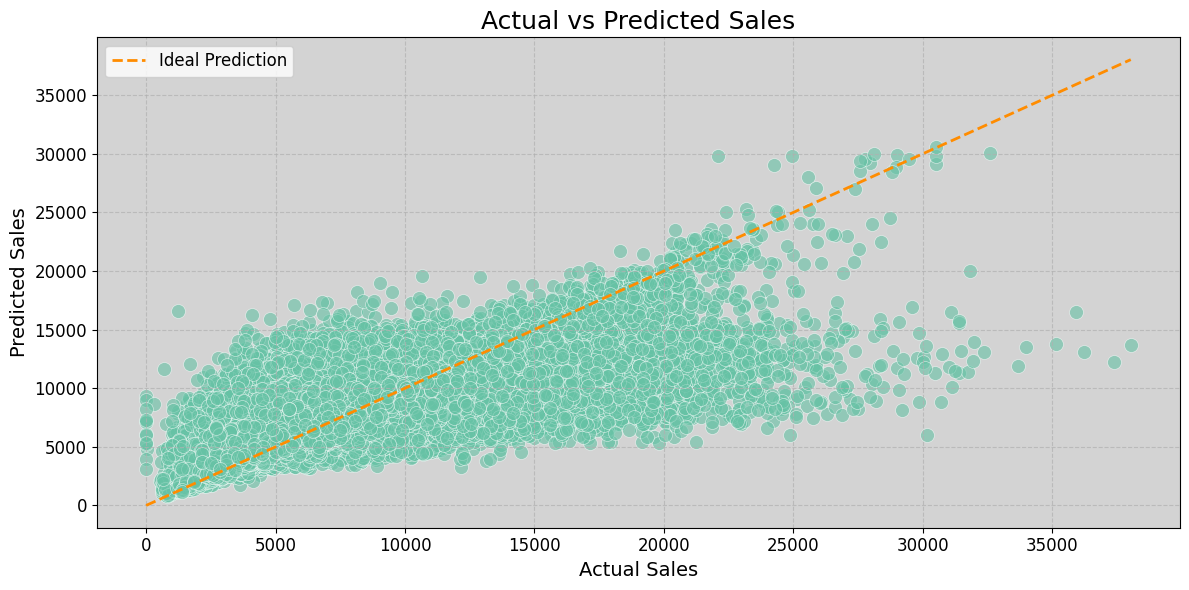

In [7]:
sales_model.plot_actual_vs_predicted()